# Exploratory Data Analysis EDA

In [90]:
import pandas as pd
import numpy as np
import plotly.express as px

In [91]:
data_train = pd.read_csv('AVI Dataset/train.csv.zip')

In [92]:
data_train.head()

,Id,Title,Body,Score,ViewCount,Label,LabelNum
0,197234,Drop\stop mobile data connection (non-wifi) by...,<p>Can I set Android 4.4.2 to drop mobile data...,0,34,android,0
1,114800,How to automatically crop text messages when S...,<p>Is there a way to prevent the Messages app ...,0,836,android,0
2,124532,Can't find text message that was to a group,<p>When John Doe texts to a group that include...,1,28,android,0
3,193875,Can't store contacts on my Android phone,<p>I was going through all of my installed app...,0,158,android,0
4,50332,Dropbox on Samsung Galaxy - where is the Setti...,"<p>On a Sony Xperia, the settings button in Dr...",1,963,android,0


In [93]:
# Dimensions of the dataset
print("Dimensions of the dataset:", data_train.shape)

# Display the first few rows
print("First few rows of the dataset:")
print(data_train.head())

# Check data types and null values
print("Data types and null values:")
print(data_train.info())

Dimensions of the dataset: (51370, 7)
First few rows of the dataset:
       Id                                              Title   
0  197234  Drop\stop mobile data connection (non-wifi) by...  \
1  114800  How to automatically crop text messages when S...   
2  124532        Can't find text message that was to a group   
3  193875           Can't store contacts on my Android phone   
4   50332  Dropbox on Samsung Galaxy - where is the Setti...   

                                                Body  Score  ViewCount   
0  <p>Can I set Android 4.4.2 to drop mobile data...      0         34  \
1  <p>Is there a way to prevent the Messages app ...      0        836   
2  <p>When John Doe texts to a group that include...      1         28   
3  <p>I was going through all of my installed app...      0        158   
4  <p>On a Sony Xperia, the settings button in Dr...      1        963   

     Label  LabelNum  
0  android         0  
1  android         0  
2  android         0  
3  androi

In [94]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data_train.describe())


Summary statistics for numerical columns:
                  Id         Score     ViewCount      LabelNum
count   51370.000000  51370.000000  5.137000e+04  51370.000000
mean   136316.053163      2.156726  7.984175e+03      0.276757
std     94556.514006      5.967886  3.746801e+04      0.447400
min         1.000000    -21.000000  4.000000e+00      0.000000
25%     54567.250000      0.000000  1.780000e+02      0.000000
50%    128724.500000      1.000000  8.190000e+02      0.000000
75%    199185.750000      2.000000  3.516750e+03      1.000000
max    400716.000000    489.000000  2.698958e+06      1.000000


Distribution of labels:
Label
android    37153
ios        14217
Name: count, dtype: int64


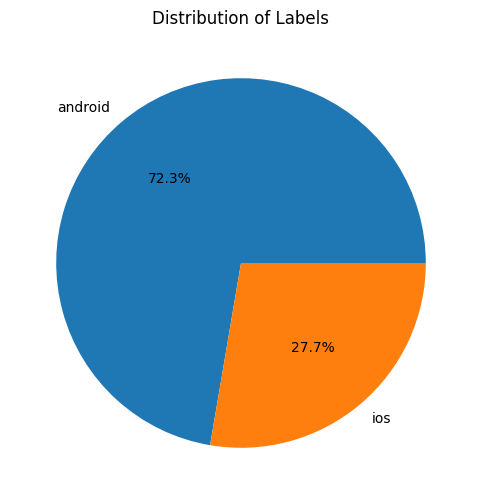

In [95]:
import matplotlib.pyplot as plt

# Distribution of labels
label_distribution = data_train['Label'].value_counts()
print("Distribution of labels:")
print(label_distribution)

# Pie chart of label distribution
plt.figure(figsize=(6, 6))
plt.pie(label_distribution, labels=label_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.show()


In [96]:
# Check for duplicates
duplicate_rows = data_train[data_train.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


print(data_train['Score'].max())

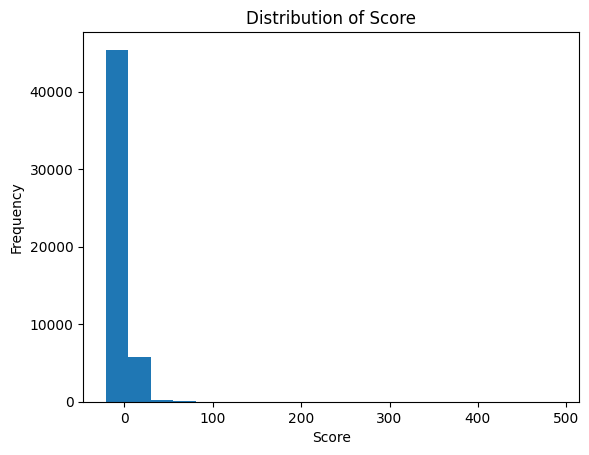

In [97]:
import matplotlib.pyplot as plt

# Histogram of 'Score' column
plt.hist(data_train['Score'], bins=20, range=(data_train['Score'].min(), data_train['Score'].max()))
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()



There are outliers in score

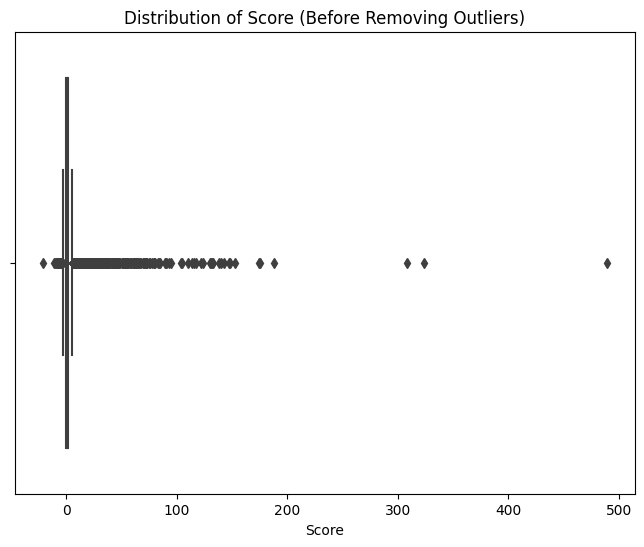

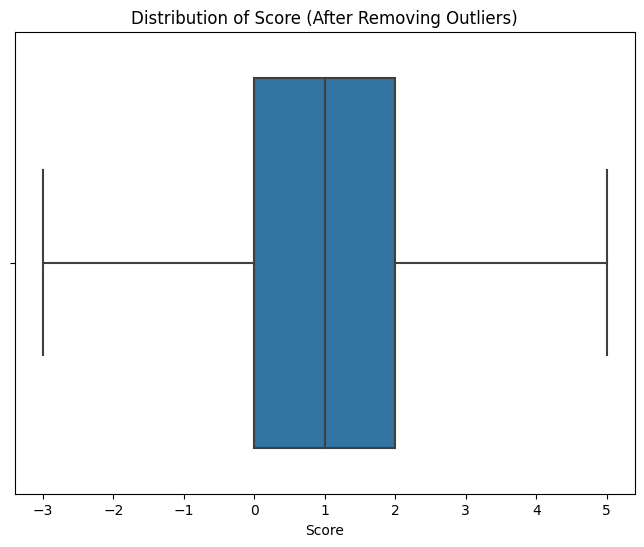

In [98]:
import seaborn as sns

# Define function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Visualize distribution of 'Score' before removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_train['Score'])
plt.title('Distribution of Score (Before Removing Outliers)')
plt.xlabel('Score')
plt.show()

# Remove outliers from 'Score' column
data_no_outliers = remove_outliers_iqr(data_train, 'Score')

# Visualize distribution of 'Score' after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_no_outliers['Score'])
plt.title('Distribution of Score (After Removing Outliers)')
plt.xlabel('Score')
plt.show()


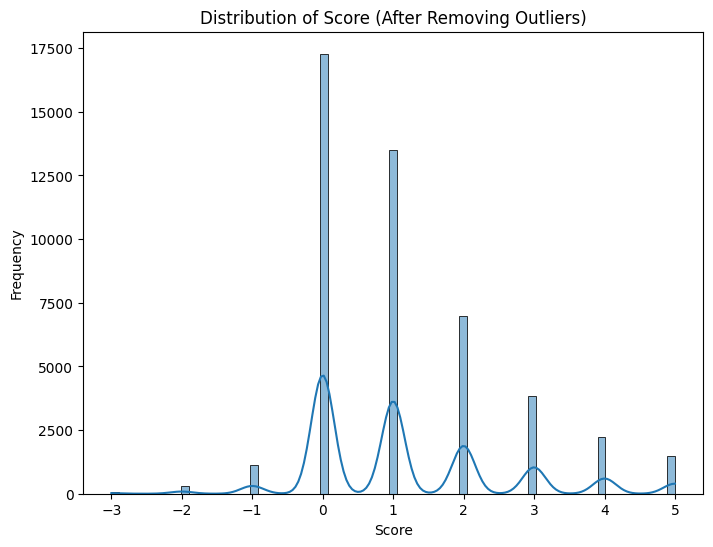

In [99]:
# Visualize distribution of 'Score' using histogram
plt.figure(figsize=(8, 6))
sns.histplot(data_no_outliers['Score'], kde=True)
plt.title('Distribution of Score (After Removing Outliers)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [100]:
# Compute text length
data_train['Title_Length'] = data_train['Title'].apply(lambda x: len(x.split()))
data_train['Body_Length'] = data_train['Body'].apply(lambda x: len(x.split()))

# Summary statistics for text length
print("Summary statistics for text length:")
print(data_train[['Title_Length', 'Body_Length']].describe())


Summary statistics for text length:
       Title_Length   Body_Length
count  51370.000000  51370.000000
mean       9.478061    102.689605
std        3.904807     97.652700
min        1.000000      5.000000
25%        7.000000     49.000000
50%        9.000000     78.000000
75%       12.000000    125.000000
max       33.000000   3344.000000


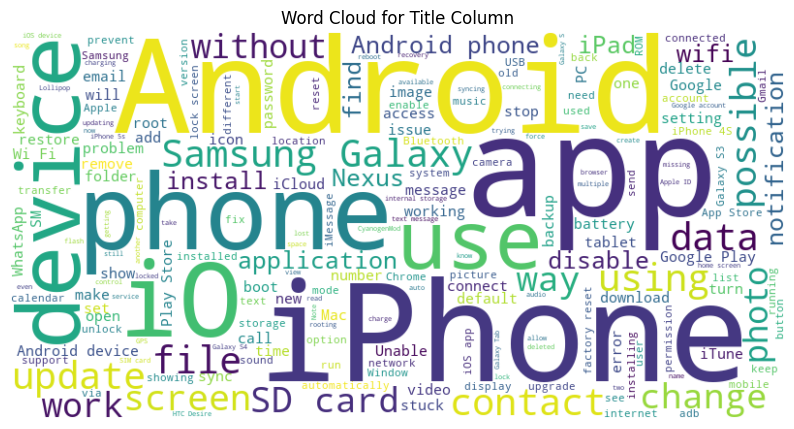

In [101]:
from wordcloud import WordCloud

# Concatenate all titles into a single string
titles_text = ' '.join(data_train['Title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Title Column')
plt.axis('off')
plt.show()


In [102]:
px.histogram(data_train, x='Score', range_x=[-5, 50], color='Label')

In [103]:
px.scatter(data_train, x='Score', y='ViewCount', color='Label', log_y=True, marginal_y='box', range_x=[-20, 200])

### Textual Analysis

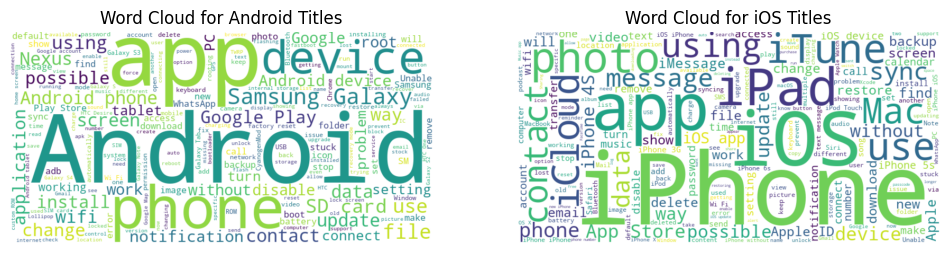

In [104]:
# Separate data by label
android_data = data_train[data_train['Label'] == 'android']
ios_data = data_train[data_train['Label'] == 'ios']

# Generate word clouds for Android and iOS titles
android_titles_text = ' '.join(android_data['Title'])
ios_titles_text = ' '.join(ios_data['Title'])

android_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(android_titles_text)
ios_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ios_titles_text)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(android_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Android Titles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ios_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for iOS Titles')
plt.axis('off')

plt.show()


In [105]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data_train['Title'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()


Topic 1:
galaxy samsung google wifi does android work doesn network internet

Topic 2:
app android device apple ios music does keyboard change htc

Topic 3:
android data phone contacts device account using adb sync file

Topic 4:
iphone screen phone lock messages notification text android sms usb

Topic 5:
ios apps app card android play sd google iphone store



Topic 1: Connectivity and Network Issues (Android):

This topic includes terms related to connectivity and network problems commonly experienced by Android users, such as issues with Wi-Fi, internet, and network connectivity.
Topic 2: App and Device Management (Android and iOS):

This topic covers terms related to managing apps and devices, including topics like app installation, device compatibility, and keyboard settings. It appears to encompass aspects relevant to both Android and iOS platforms.
Topic 3: Data Management and Synchronization (Android):

This topic focuses on data management and synchronization tasks associated with Android devices. It includes terms related to managing phone data, syncing contacts, and using tools like ADB (Android Debug Bridge).
Topic 4: Device Operations and Notifications (Android and iOS):

This topic discusses various device operations and notifications, including tasks like locking the screen, receiving text messages, and handling notifications. These operations are relevant to both Android and iOS platforms.
Topic 5: App Store and Application Management (iOS and Android):

This topic revolves around app store-related terms and application management tasks, including topics like installing apps, using app stores (e.g., Google Play, App Store), and managing storage space with SD cards. It appears to encompass aspects relevant to both iOS and Android platforms.


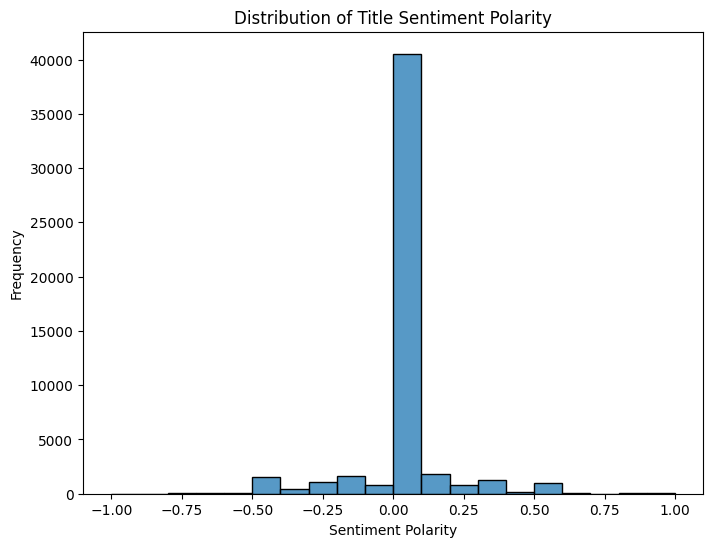

In [106]:
from textblob import TextBlob

# Compute sentiment polarity for each title
data_train['Title_Sentiment'] = data_train['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot distribution of sentiment polarity
plt.figure(figsize=(8, 6))
sns.histplot(data_train['Title_Sentiment'], bins=20)
plt.title('Distribution of Title Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


## Data Preprocessing

### Lowercasing


In [107]:
data_train['Title'] = data_train['Title'].str.lower()
data_train['Body'] = data_train['Body'].str.lower()


### Tokenization

In [108]:
import nltk
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

# Download necessary NLTK resources
nltk.download('punkt')

# Function to clean HTML tags and tokenize text, preserving contractions
def tokenize_text_with_html_and_contractions(text):
    # Clean HTML tags
    cleaned_text = BeautifulSoup(text, "html.parser").get_text(separator=" ")
    # Tokenize the cleaned text while preserving contractions
    tokens = word_tokenize(cleaned_text)
    # Merge contractions if separated (e.g., "ca", "n't" -> "can't")
    merged_tokens = []
    i = 0
    while i < len(tokens):
        if i < len(tokens) - 1 and tokens[i + 1] == "n't":
            merged_tokens.append(tokens[i] + tokens[i + 1])
            i += 2
        else:
            merged_tokens.append(tokens[i])
            i += 1
    return merged_tokens

# Tokenize 'Title' and 'Body' columns while handling HTML tags and contractions
data_train['Title_tokens'] = data_train['Title'].apply(tokenize_text_with_html_and_contractions)
data_train['Body_tokens'] = data_train['Body'].apply(tokenize_text_with_html_and_contractions)


# Print the first row to verify tokenization
data_train.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\moham\AppData\Local\Temp\ipykernel_2936\3475163155.py:11: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



,Id,Title,Body,Score,ViewCount,Label,LabelNum,Title_Length,Body_Length,Title_Sentiment,Title_tokens,Body_tokens
0,197234,drop\stop mobile data connection (non-wifi) by...,<p>can i set android 4.4.2 to drop mobile data...,0,34,android,0,7,34,0.0,"[drop\stop, mobile, data, connection, (, non-w...","[can, i, set, android, 4.4.2, to, drop, mobile..."
1,114800,how to automatically crop text messages when s...,<p>is there a way to prevent the messages app ...,0,836,android,0,12,49,0.0,"[how, to, automatically, crop, text, messages,...","[is, there, a, way, to, prevent, the, messages..."
2,124532,can't find text message that was to a group,<p>when john doe texts to a group that include...,1,28,android,0,9,41,0.0,"[can't, find, text, message, that, was, to, a,...","[when, john, doe, texts, to, a, group, that, i..."
3,193875,can't store contacts on my android phone,<p>i was going through all of my installed app...,0,158,android,0,7,183,0.0,"[can't, store, contacts, on, my, android, phone]","[i, was, going, through, all, of, my, installe..."
4,50332,dropbox on samsung galaxy - where is the setti...,"<p>on a sony xperia, the settings button in dr...",1,963,android,0,10,49,0.0,"[dropbox, on, samsung, galaxy, -, where, is, t...","[on, a, sony, xperia, ,, the, settings, button..."


### Removing Punctuation


In [116]:

import string

# Remove punctuation from Title and Body columns
data_train['Title_tokens'] = data_train['Title_tokens'].apply(lambda x: [word for word in x if word not in string.punctuation])
data_train['Body_tokens'] = data_train['Body_tokens'].apply(lambda x: [word for word in x if word not in string.punctuation])

data_train["Title_tokens"].head(100)


0     [drop\stop, mobil, data, connect, non-wifi, co...
1     [automat, crop, text, messag, sm, charact, lim...
2                    [can't, find, text, messag, group]
3               [can't, store, contact, android, phone]
4               [dropbox, samsung, galaxi, set, button]
                            ...                        
95                     [gmail, notif, sound, new, mail]
96    [low-level, copi, appdata, android, 4, kitkat,...
97    [background, app, get, kill, someth, batteri, ...
98       [updat, fastboot, driver, soni, xperia, devic]
99    [prebuilt, apk, doesnt, launch, preload, launc...
Name: Title_tokens, Length: 100, dtype: object

### Removing Stopwords


In [110]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from Title and Body columns
data_train['Title_tokens'] = data_train['Title_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
data_train['Body_tokens'] = data_train['Body_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

data_train.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,Title,Body,Score,ViewCount,Label,LabelNum,Title_Length,Body_Length,Title_Sentiment,Title_tokens,Body_tokens
0,197234,drop\stop mobile data connection (non-wifi) by...,<p>can i set android 4.4.2 to drop mobile data...,0,34,android,0,7,34,0.0,"[drop\stop, mobile, data, connection, non-wifi...","[set, android, 4.4.2, drop, mobile, data, conn..."
1,114800,how to automatically crop text messages when s...,<p>is there a way to prevent the messages app ...,0,836,android,0,12,49,0.0,"[automatically, crop, text, messages, sms, cha...","[way, prevent, messages, app, sending, long, t..."
2,124532,can't find text message that was to a group,<p>when john doe texts to a group that include...,1,28,android,0,9,41,0.0,"[can't, find, text, message, group]","[john, doe, texts, group, includes, appears, n..."
3,193875,can't store contacts on my android phone,<p>i was going through all of my installed app...,0,158,android,0,7,183,0.0,"[can't, store, contacts, android, phone]","[going, installed, applications, phone, ago, c..."
4,50332,dropbox on samsung galaxy - where is the setti...,"<p>on a sony xperia, the settings button in dr...",1,963,android,0,10,49,0.0,"[dropbox, samsung, galaxy, settings, button]","[sony, xperia, settings, button, dropbox, top,..."


### Stemming / Lemmatization

In [111]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

# Stemming
data_train['Title_tokens'] = data_train['Title_tokens'].apply(lambda x: [porter.stem(word) for word in x])
data_train['Body_tokens'] = data_train['Body_tokens'].apply(lambda x: [porter.stem(word) for word in x])


### Joining Tokens: Reconstruct the text data by joining tokens into strings.


In [112]:
data_train['Title_clean'] = data_train['Title_tokens'].apply(lambda x: ' '.join(x))
data_train['Body_clean'] = data_train['Body_tokens'].apply(lambda x: ' '.join(x))

data_train.head()

,Id,Title,Body,Score,ViewCount,Label,LabelNum,Title_Length,Body_Length,Title_Sentiment,Title_tokens,Body_tokens,Title_clean,Body_clean
0,197234,drop\stop mobile data connection (non-wifi) by...,<p>can i set android 4.4.2 to drop mobile data...,0,34,android,0,7,34,0.0,"[drop\stop, mobil, data, connect, non-wifi, co...","[set, android, 4.4.2, drop, mobil, data, conne...",drop\stop mobil data connect non-wifi condit,set android 4.4.2 drop mobil data connect data...
1,114800,how to automatically crop text messages when s...,<p>is there a way to prevent the messages app ...,0,836,android,0,12,49,0.0,"[automat, crop, text, messag, sm, charact, lim...","[way, prevent, messag, app, send, long, text, ...",automat crop text messag sm charact limit reach,way prevent messag app send long text 's gener...
2,124532,can't find text message that was to a group,<p>when john doe texts to a group that include...,1,28,android,0,9,41,0.0,"[can't, find, text, messag, group]","[john, doe, text, group, includ, appear, notif...",can't find text messag group,john doe text group includ appear notif upper ...
3,193875,can't store contacts on my android phone,<p>i was going through all of my installed app...,0,158,android,0,7,183,0.0,"[can't, store, contact, android, phone]","[go, instal, applic, phone, ago, clear, junk, ...",can't store contact android phone,go instal applic phone ago clear junk need lik...
4,50332,dropbox on samsung galaxy - where is the setti...,"<p>on a sony xperia, the settings button in dr...",1,963,android,0,10,49,0.0,"[dropbox, samsung, galaxi, set, button]","[soni, xperia, set, button, dropbox, top, righ...",dropbox samsung galaxi set button,soni xperia set button dropbox top right samsu...


# Result

Most common words in titles:
[('android', 7555), ('app', 7419), ('iphon', 6396), ('phone', 4351), ('io', 3383), ('use', 3344), ('googl', 3087), ('devic', 3024), ("''", 2739), ('``', 2728)]
Most common words in bodies:
[('phone', 44073), ('app', 42396), ('use', 36047), ('android', 27134), ("''", 27121), ('devic', 24023), ('``', 23671), ('tri', 22633), ("'s", 21076), ('work', 18075)]


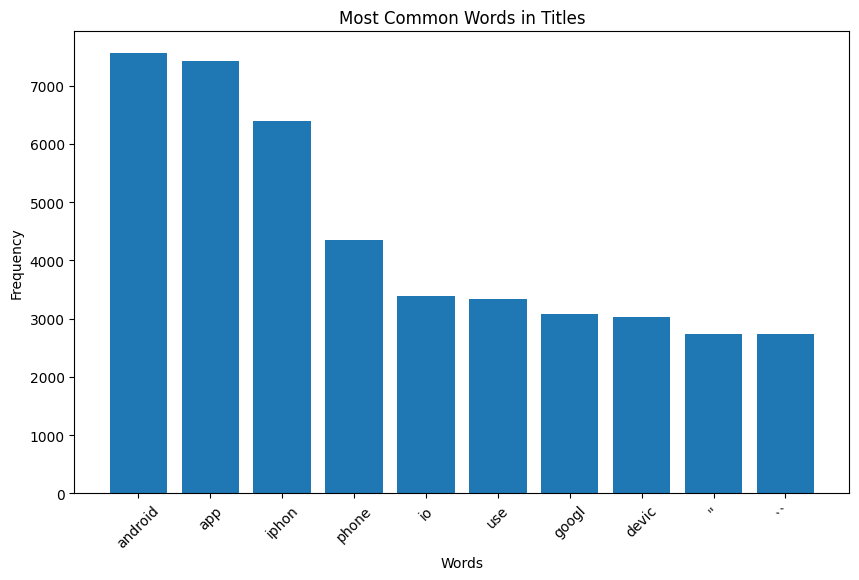

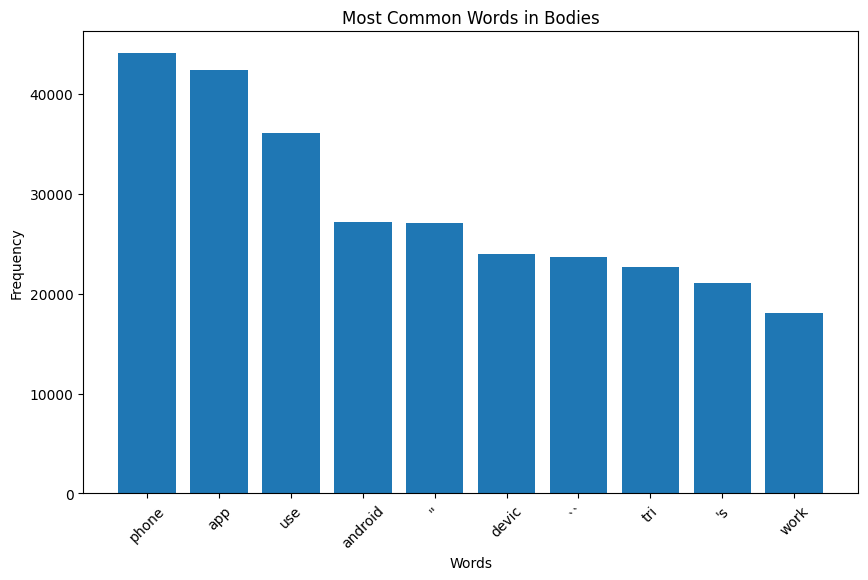

In [113]:
from collections import Counter
import matplotlib.pyplot as plt

# Word frequency analysis for Title
title_words = ' '.join(data_train['Title_clean']).split()
title_word_counts = Counter(title_words)
print("Most common words in titles:")
print(title_word_counts.most_common(10))

# Word frequency analysis for Body
body_words = ' '.join(data_train['Body_clean']).split()
body_word_counts = Counter(body_words)
print("Most common words in bodies:")
print(body_word_counts.most_common(10))

# Function to visualize word frequency analysis
def plot_word_frequency(word_counts, title):
    words, counts = zip(*word_counts.most_common(10))  # Extract top 10 words and their counts
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Visualize word frequency analysis for Title
plot_word_frequency(title_word_counts, 'Most Common Words in Titles')

# Visualize word frequency analysis for Body
plot_word_frequency(body_word_counts, 'Most Common Words in Bodies')
